In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import bartlett
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("juroe_project_proposal.csv", encoding = "utf-8")
df

,Rank,Movie Title,Wins,Nominations,year,rating,genre,score,votes,country,budget,gross,company,runtime
0,1,The Shawshank Redemption,21,42,1994,R,Drama,9.3,2400000.0,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
1,3,The Dark Knight,164,165,2008,PG-13,Action,9.0,2400000.0,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2,6,The Lord of the Rings: The Return of the King,215,124,2003,PG-13,Action,8.9,1700000.0,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
3,7,Schindler's List,91,49,1993,R,Biography,8.9,1200000.0,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
4,8,Pulp Fiction,69,72,1994,R,Crime,8.9,1900000.0,United States,8000000.0,2.139288e+08,Miramax,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,244,Into the Wild,13,6,2007,R,Adventure,8.1,588000.0,United States,15000000.0,5.667590e+07,Paramount Vantage,148.0
138,246,Groundhog Day,7,17,1993,PG,Comedy,8.0,589000.0,United States,14600000.0,7.107405e+07,Columbia Pictures,101.0
139,247,The Help,79,121,2011,PG-13,Drama,8.0,436000.0,United States,25000000.0,2.166391e+08,DreamWorks,146.0
140,248,Amores Perros,55,24,2000,R,Drama,8.1,228000.0,Mexico,2000000.0,2.090847e+07,Altavista Films,154.0


### Is there a correlation between a movie's budget and being nominated for/winning awards?

In [4]:
#Descriptive Statistics on Nominations
column = df["Nominations"]
column_name = "Nominations"

In [5]:
print(f"Statistics of the {column_name} column")
print("-"*50)

print(f"{column_name} count: {column.count()}") # number of non-null entries
print(f"{column_name} mean: {column.mean()}") # sum of all values / n


# spread describes the extremes and variation 
print(f"{column_name} min: {column.min()}")
print(f"{column_name} 25%: {column.quantile(0.25)}")  # 25th percentile
print(f"{column_name} median (50%): {column.median()}")  # 50th percentile (same as 2nd quartile)
print(f"{column_name} 75%: {column.quantile(0.75)}")  # 75th percentile
print(f"{column_name} max: {column.max()}")
print(f"{column_name} interquartile range (IQR): {column.quantile(0.75) - column.quantile(0.25)}")
print(f"{column_name} range: {column.max() - column.min()}")

# the most frequent value(s) - if multiple modes exist, it returns all of them as a Series
modes = column.mode()
# handle cases where there are multiple modes
if len(modes) > 1:
    print(f"{column_name} modes: {list(modes)}")
else:
    print(f"{column_name} mode:  {modes[0]}")

print("-"*10)

# average of squared difference between each data point and the mean
print(f"{column_name} variance: {column.var()}") 
print(f"{column_name} std_dev: {column.std()}") # square root of variance


print(f"{column_name} skewness: {column.skew()}")


print(f"{column_name} kurtosis: {column.kurt()}")

Statistics of the Nominations column
--------------------------------------------------
Nominations count: 142
Nominations mean: 67.25352112676056
Nominations min: 1
Nominations 25%: 23.0
Nominations median (50%): 46.5
Nominations 75%: 95.0
Nominations max: 338
Nominations interquartile range (IQR): 72.0
Nominations range: 337
Nominations mode:  38
----------
Nominations variance: 3870.7154130456483
Nominations std_dev: 62.21507384103669
Nominations skewness: 1.642925470330256
Nominations kurtosis: 3.00609780018883


### Boxplot For Nominations

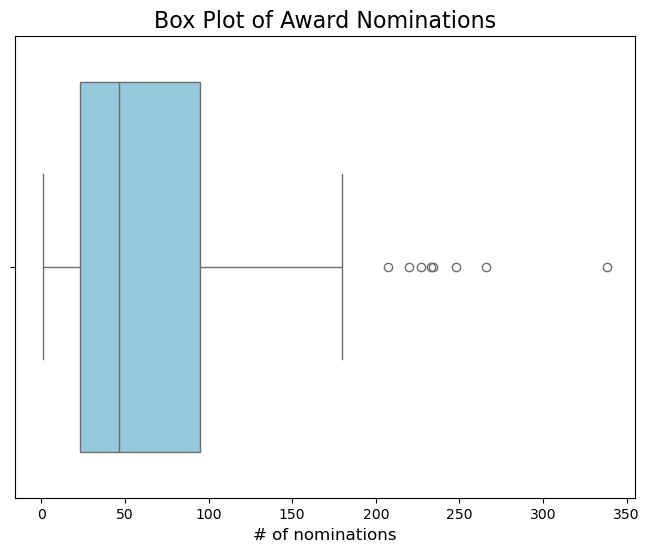

In [7]:
# set plot size
plt.figure(figsize=(8, 6))

# create a box plot for 'CreditScore'
sns.boxplot(x=column, color="skyblue")

# add title and labels
plt.title("Box Plot of Award Nominations", fontsize=16)
plt.xlabel("# of nominations", fontsize=12)

# display the plot
plt.show()

### Histogram For Nominations

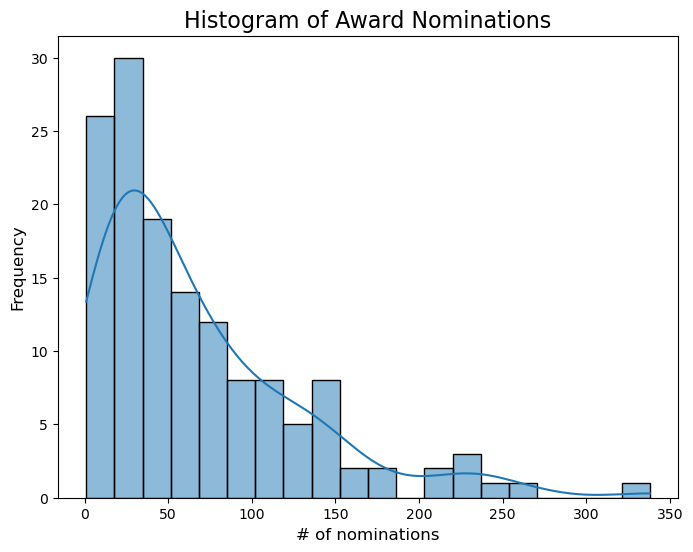

In [9]:
# set plot size
plt.figure(figsize=(8, 6))

# create a histogram for 'CreditScore'
sns.histplot(column, bins=20, kde=True)

# add title and labels
plt.title("Histogram of Award Nominations", fontsize=16)
plt.xlabel("# of nominations", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# display the plot
plt.show()

In [10]:
#Descriptive Statistics on Awards Won
column = df["Wins"]
column_name = "Awards"

In [11]:
print(f"Statistics of the {column_name} column")
print("-"*50)

print(f"{column_name} count: {column.count()}") # number of non-null entries
print(f"{column_name} mean: {column.mean()}") # sum of all values / n


# spread describes the extremes and variation 
print(f"{column_name} min: {column.min()}")
print(f"{column_name} 25%: {column.quantile(0.25)}")  # 25th percentile
print(f"{column_name} median (50%): {column.median()}")  # 50th percentile (same as 2nd quartile)
print(f"{column_name} 75%: {column.quantile(0.75)}")  # 75th percentile
print(f"{column_name} max: {column.max()}")
print(f"{column_name} interquartile range (IQR): {column.quantile(0.75) - column.quantile(0.25)}")
print(f"{column_name} range: {column.max() - column.min()}")

# the most frequent value(s) - if multiple modes exist, it returns all of them as a Series
modes = column.mode()
# handle cases where there are multiple modes
if len(modes) > 1:
    print(f"{column_name} modes: {list(modes)}")
else:
    print(f"{column_name} mode:  {modes[0]}")

print("-"*10)

# average of squared difference between each data point and the mean
print(f"{column_name} variance: {column.var()}") 
print(f"{column_name} std_dev: {column.std()}") # square root of variance


print(f"{column_name} skewness: {column.skew()}")


print(f"{column_name} kurtosis: {column.kurt()}")

Statistics of the Awards column
--------------------------------------------------
Awards count: 142
Awards mean: 53.352112676056336
Awards min: 0
Awards 25%: 15.0
Awards median (50%): 38.5
Awards 75%: 71.75
Awards max: 318
Awards interquartile range (IQR): 56.75
Awards range: 318
Awards modes: [6, 13]
----------
Awards variance: 2776.598541604235
Awards std_dev: 52.69343926528458
Awards skewness: 2.048566395017469
Awards kurtosis: 5.802800972908816


### Boxplot For Awards

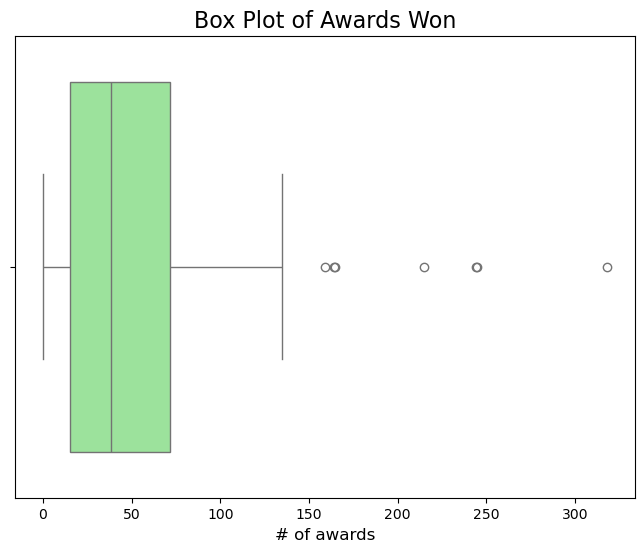

In [13]:
# set plot size
plt.figure(figsize=(8, 6))

# create a box plot for 'CreditScore'
sns.boxplot(x=column, color="lightgreen")

# add title and labels
plt.title("Box Plot of Awards Won", fontsize=16)
plt.xlabel("# of awards", fontsize=12)

# display the plot
plt.show()

### Histogram For Awards

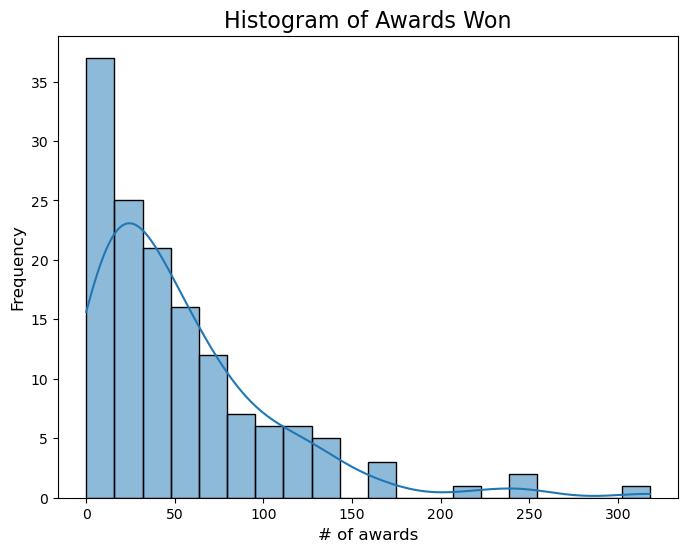

In [15]:
# set plot size
plt.figure(figsize=(8, 6))

# create a histogram for 'CreditScore'
sns.histplot(column, bins=20, kde=True)

# add title and labels
plt.title("Histogram of Awards Won", fontsize=16)
plt.xlabel("# of awards", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# display the plot
plt.show()

### Hypothesis test: Barlett's test for equal variance
H<sub>0</sub>: Variance is equal

In [17]:
nominations = df["Nominations"]
awards = df["Wins"]

# perform Bartlett's test for equal variance
stat, p_value = bartlett(nominations, awards)

# display the p-value with 5 decimal places
print(f"Bartlett's test p-value: {p_value:.5f}")

# interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: The variances are significantly different.")
else:
    print("Fail to reject H0: The variances are not significantly different.")

Bartlett's test p-value: 0.04948
Reject H0: The variances are significantly different.


### Pearson Correlation (Linear Correlation)
Correlation measures the **strength and direction of the linear relationship** between two continuous variables (e.g., budget vs. nominations).

In [19]:
# calculate Pearson correlation between 'budget' and 'nominations'
pearson_corr = df["Nominations"].corr(df["budget"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.3328
Interpretation: Moderate linear correlation.


Pearson Correlation for budget vs. awards

In [21]:
# calculate Pearson correlation between 'budget' and 'Wins'
pearson_corr = df["Wins"].corr(df["budget"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.2087
Interpretation: No or weak linear correlation.


Conclusion/interpretation: There is a moderate correlation between a movie's budget and the amount of awards it is nominated for, however, there is little to no correlation between a movie's budget and the amount of awards it wins.

### Hypothosis test
See if high vs low budgets award nomination variances are equal. Barlett's test

H<sub>0</sub>: Variances are equal

In [25]:
med = df['budget'].median()
print(f'The median of the budget column is {med}')

The median of the budget column is 25000000.0


In [41]:
# extract nominations for high and low budgets
high_budget = df[df["budget"] >= 25000000]["Nominations"]
low_budget = df[df["budget"] < 25000000]["Nominations"]

# perform Bartlett's test for equal variance
stat, p_value = bartlett(high_budget, low_budget)

# display the p-value with 5 decimal places
print(f"Bartlett's test p-value: {p_value:.5f}")

# interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: The variances are significantly different.")
else:
    print("Fail to reject H0: The variances are not significantly different.")

Bartlett's test p-value: 0.70748
Fail to reject H0: The variances are not significantly different.


See if high vs. low budgets award win variances are equal. Barlett's test

In [44]:
# extract award wins for high and low budgets
high_budget = df[df["budget"] >= 25000000]["Wins"]
low_budget = df[df["budget"] < 25000000]["Wins"]

# perform Bartlett's test for equal variance
stat, p_value = bartlett(high_budget, low_budget)

# display the p-value with 5 decimal places
print(f"Bartlett's test p-value: {p_value:.5f}")

# interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: The variances are significantly different.")
else:
    print("Fail to reject H0: The variances are not significantly different.")

Bartlett's test p-value: 0.89169
Fail to reject H0: The variances are not significantly different.


### Machine Learning Technique
Linear regression between budget and award nominations/wins

Intercept for award nominations model: 50.401632537744916
Correlation between award nominations and budget: 0.33276535542841823


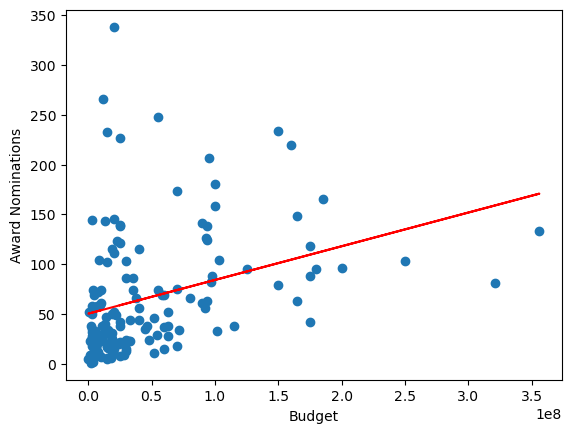

In [50]:
# Linear Regression
X = df[['budget']]
y = df['Nominations']
fit = LinearRegression().fit(X, y)
print("Intercept for award nominations model:", fit.intercept_)

# Check Assumptions
correlation = df['Nominations'].corr(df['budget'])
print("Correlation between award nominations and budget:", correlation)

# Visualization
plt.scatter(df['budget'], df['Nominations'])
plt.xlabel("Budget")
plt.ylabel("Award Nominations")
plt.plot(X, fit.predict(X), color='red')
plt.show()


Intercept for awards won model: 44.40206994473174
Correlation between awards won and budget: 0.2086669700707768


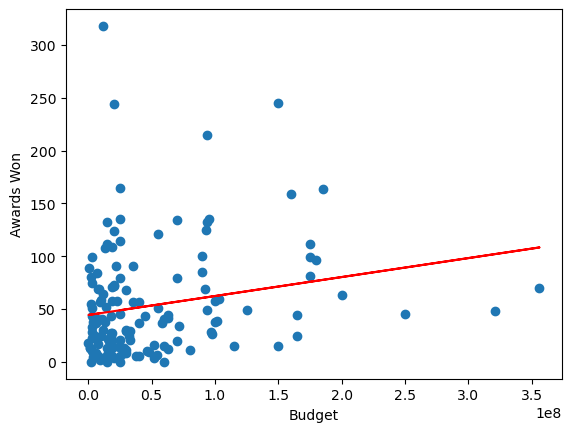

In [52]:
# Linear Regression
X = df[['budget']]
y = df['Wins']
fit = LinearRegression().fit(X, y)
print("Intercept for awards won model:", fit.intercept_)

# Check Assumptions
correlation = df['Wins'].corr(df['budget'])
print("Correlation between awards won and budget:", correlation)

# Visualization
plt.scatter(df['budget'], df['Wins'])
plt.xlabel("Budget")
plt.ylabel("Awards Won")
plt.plot(X, fit.predict(X), color='red')
plt.show()
